In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
data=pd.read_csv('data/Overwatch_edopic.csv')

In [3]:
data.columns = [c.replace(' ', '_') for c in data.columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Heroes              58 non-null     object 
 1   Damage_per_second_  53 non-null     float64
 2   Headshot_DPS__      25 non-null     float64
 3   Single_shot         44 non-null     float64
 4   Nanoboost_DPS       10 non-null     float64
 5   Health_per_Sec      12 non-null     float64
 6   Life                56 non-null     object 
 7   Reload              46 non-null     float64
dtypes: float64(6), object(2)
memory usage: 3.8+ KB


In [4]:
data.head(10)

,Heroes,Damage_per_second_,Headshot_DPS__,Single_shot,Nanoboost_DPS,Health_per_Sec,Life,Reload
0,Ana,80.0,NaN,80.0,NaN,75.0,200,10.0
1,Ana Grenade,NaN,NaN,60.0,NaN,100.0,200,1.0
2,Bastion Recon,160.0,320.0,NaN,NaN,NaN,300,20.0
3,Bastion Turret,525.0,1050.0,NaN,787.5,NaN,300,200.0
4,D.va Mech,168.0,336.0,NaN,NaN,NaN,600,inf
5,D.va Pistol,93.0,186.0,14.0,NaN,NaN,150,20.0
6,Genji Blade,50.0,NaN,50.0,NaN,NaN,200,inf
7,Genji Dragonblade,120.0,NaN,120.0,NaN,NaN,200,inf
8,Genji Shurkien,84.0,168.0,28.0,NaN,NaN,200,24.0
9,Hanzo,125.0,250.0,125.0,NaN,NaN,200,1.0


In [5]:
data.select_dtypes(include='number').corr()

,Damage_per_second_,Headshot_DPS__,Single_shot,Nanoboost_DPS,Health_per_Sec,Reload
Damage_per_second_,1.000000,0.997793,0.508045,1.000000,-0.389397,0.365645
Headshot_DPS__,0.997793,1.000000,0.499674,1.000000,0.997707,0.856391
Single_shot,0.508045,0.499674,1.000000,0.909710,-0.074045,-0.470724
Nanoboost_DPS,1.000000,1.000000,0.909710,1.000000,-1.000000,0.776221
Health_per_Sec,-0.389397,0.997707,-0.074045,-1.000000,1.000000,-0.222721
Reload,0.365645,0.856391,-0.470724,0.776221,-0.222721,1.000000


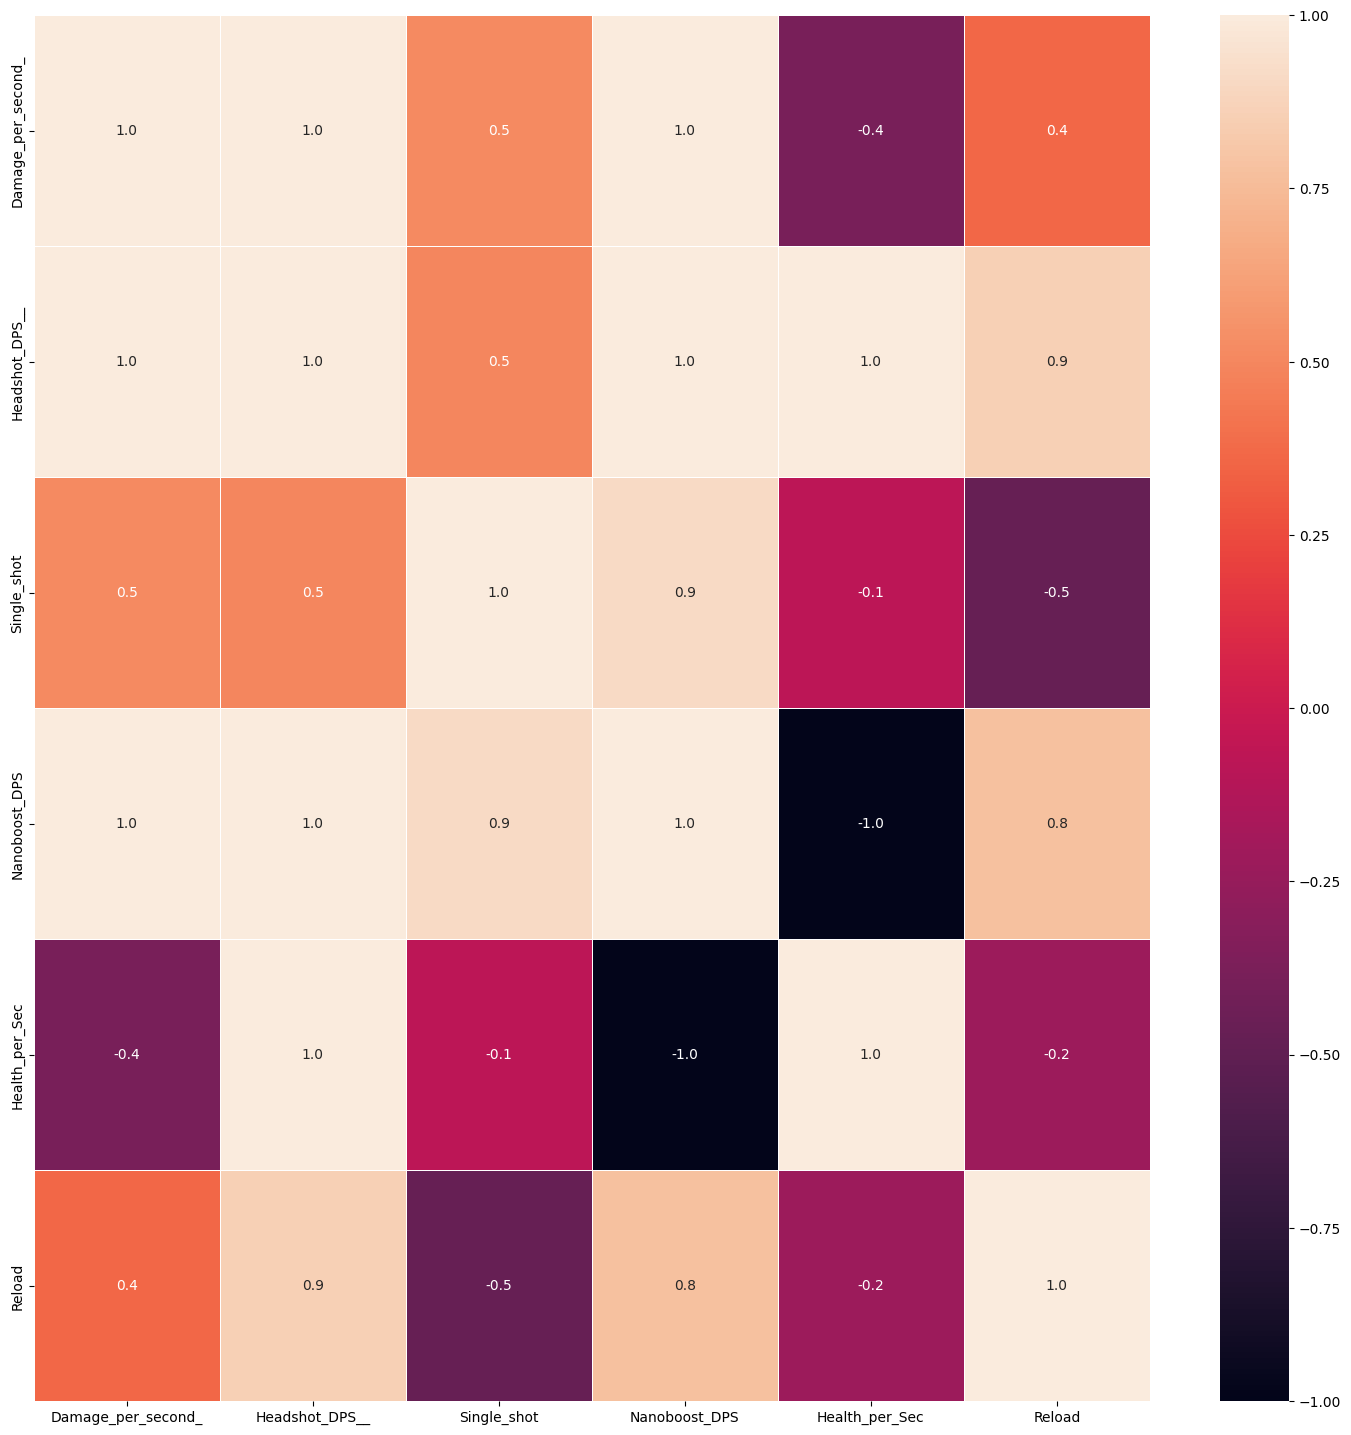

In [6]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [7]:
data.columns

Index(['Heroes', 'Damage_per_second_', 'Headshot_DPS__', 'Single_shot',
       'Nanoboost_DPS', 'Health_per_Sec', 'Life', 'Reload'],
      dtype='object')

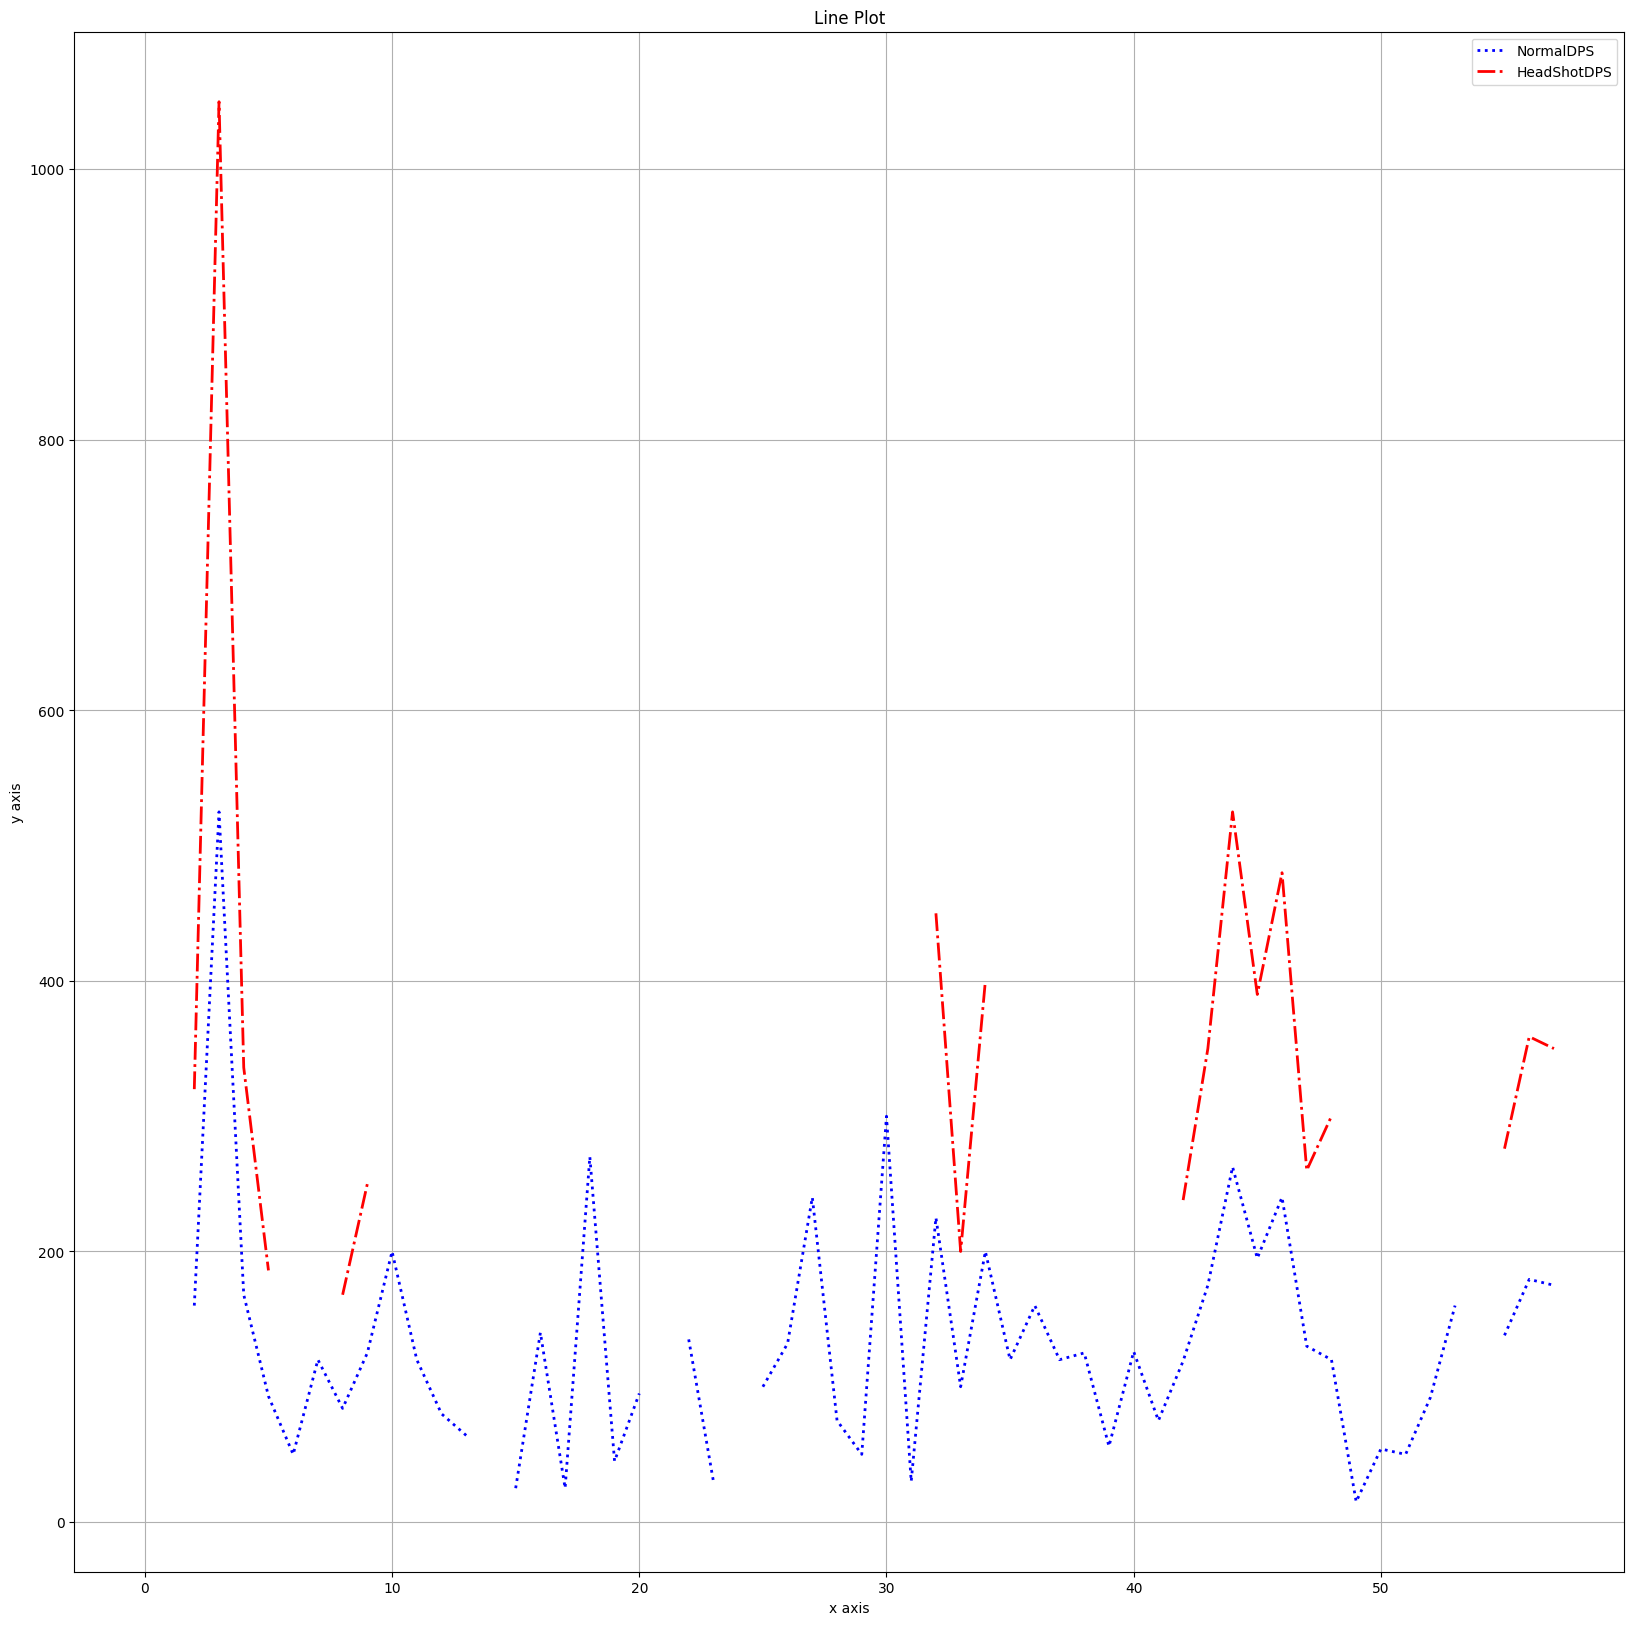

In [8]:
data.Damage_per_second_.plot(kind='line', color='blue', label = 'NormalDPS', linewidth=2, alpha=1, grid=True, linestyle=':', figsize=(20,20))
data.Headshot_DPS__.plot(color='red', label='HeadShotDPS',linewidth=2, alpha=1, grid=True, linestyle='-.')
plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line Plot')
plt.show()


Text(0.5, 1.0, 'Damage Scatter Plot')

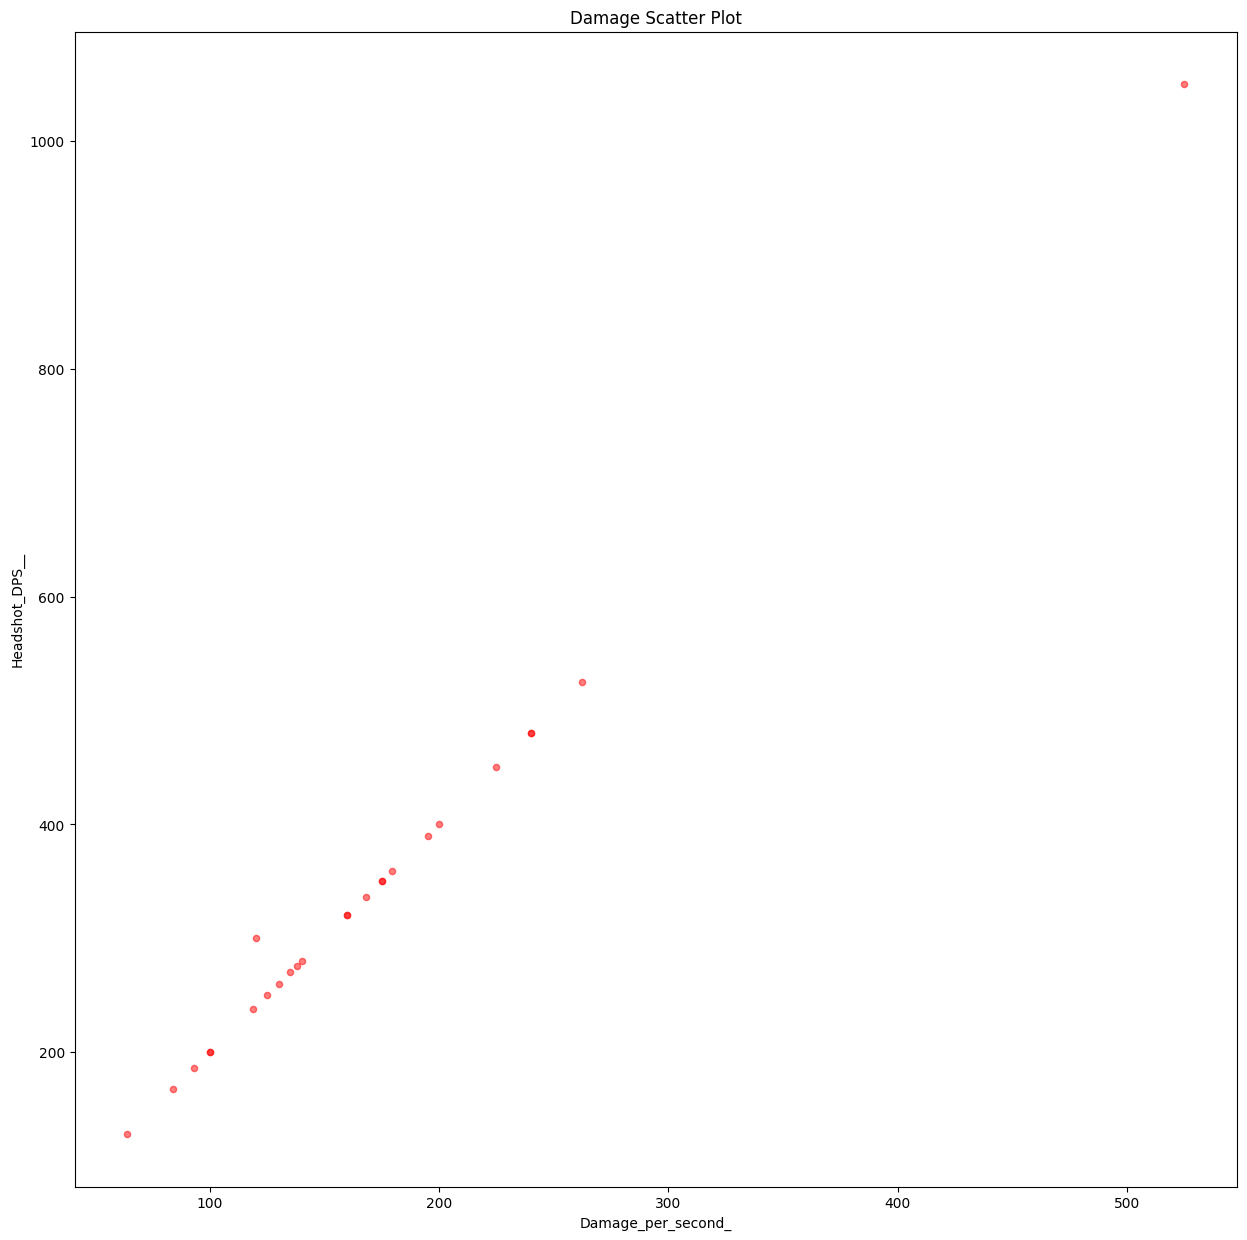

In [9]:
data.plot(kind='scatter', x='Damage_per_second_', y='Headshot_DPS__',alpha = 0.5,color = 'red', figsize=(15,15))
plt.xlabel('Damage_per_second_')             
plt.ylabel('Headshot_DPS__')
plt.title('Damage Scatter Plot') 

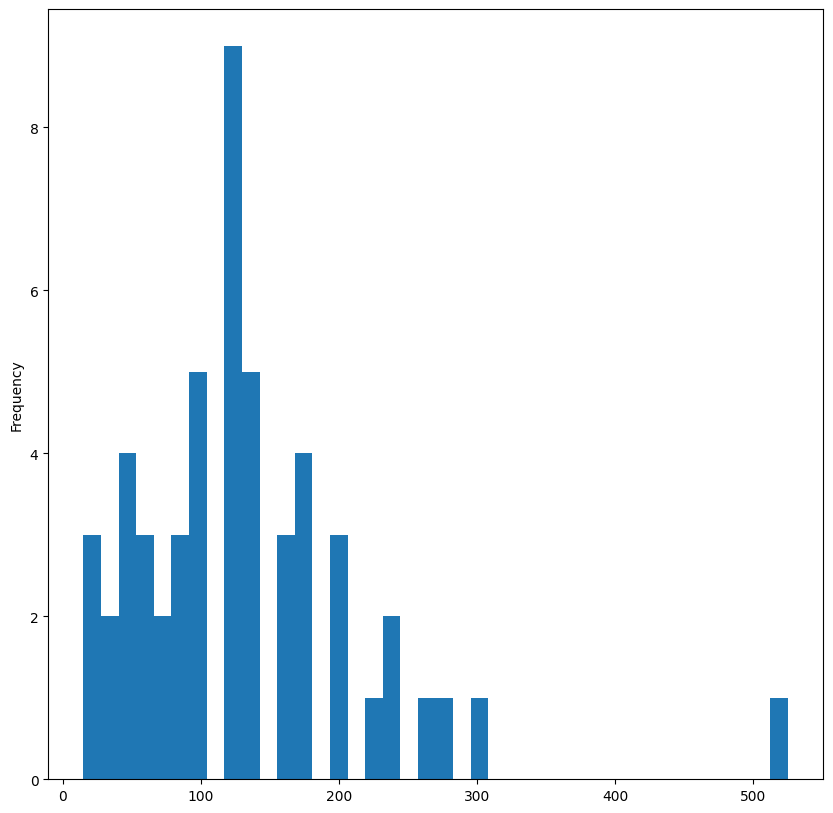

In [10]:
data.Damage_per_second_.plot(kind='hist', bins=40,figsize=(10,10))
plt.show()


Text(0.5, 1.0, 'Life Area Plot')

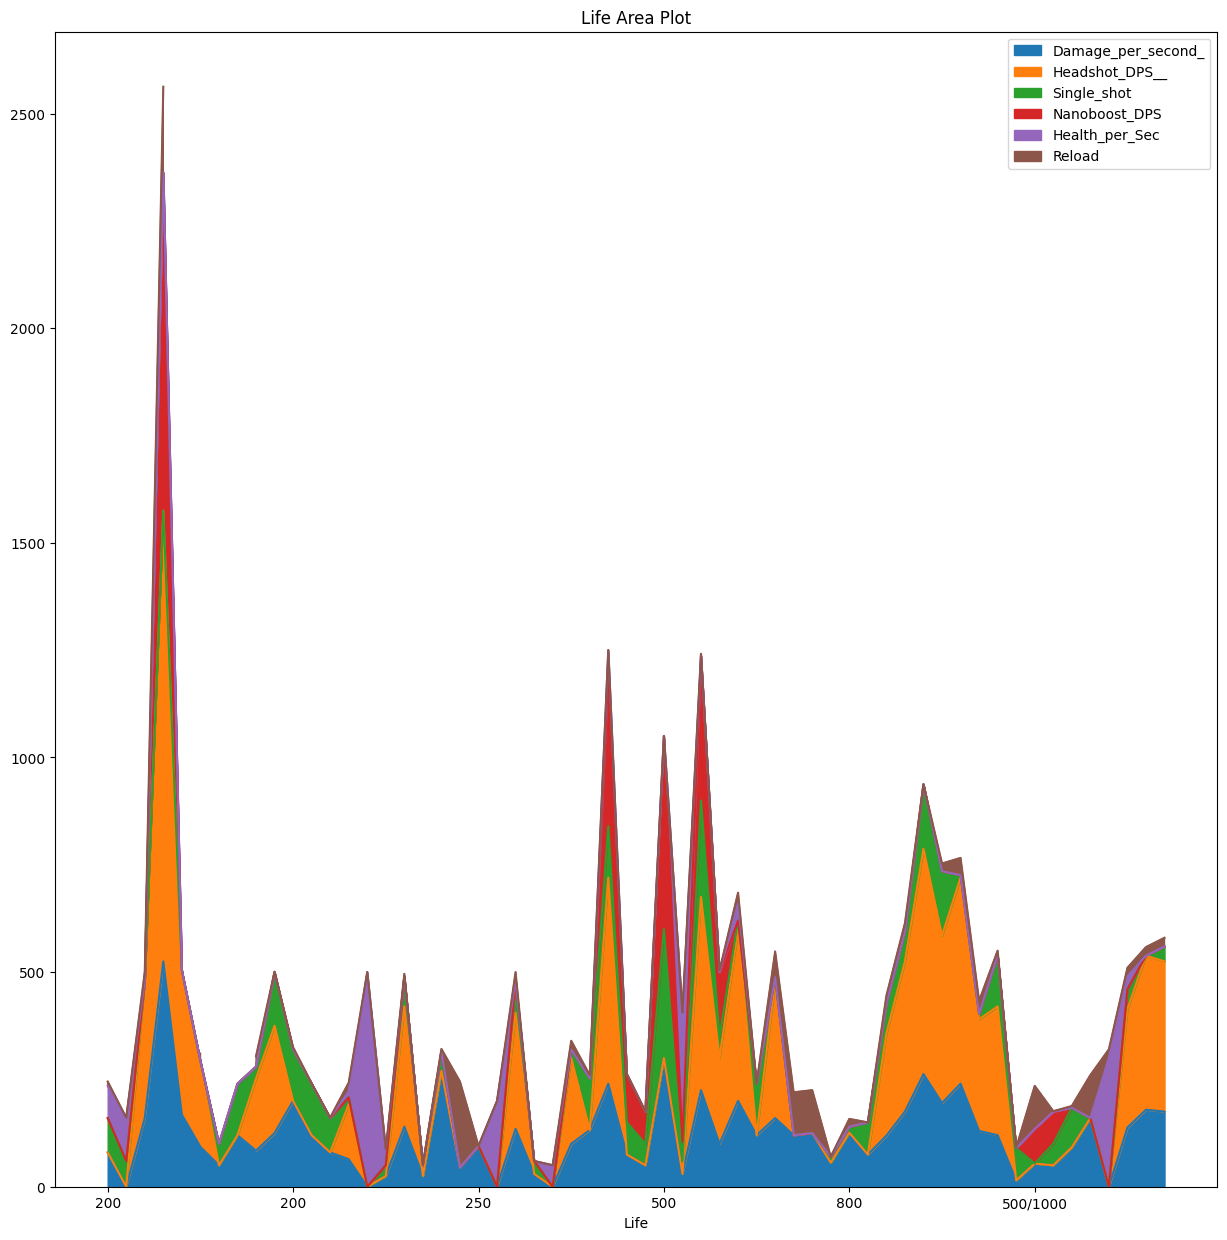

In [11]:
data.plot(kind='area', x='Life', figsize=(15,15))

plt.title('Life Area Plot') 

Text(0.5, 1.0, 'Life Pie Plot')

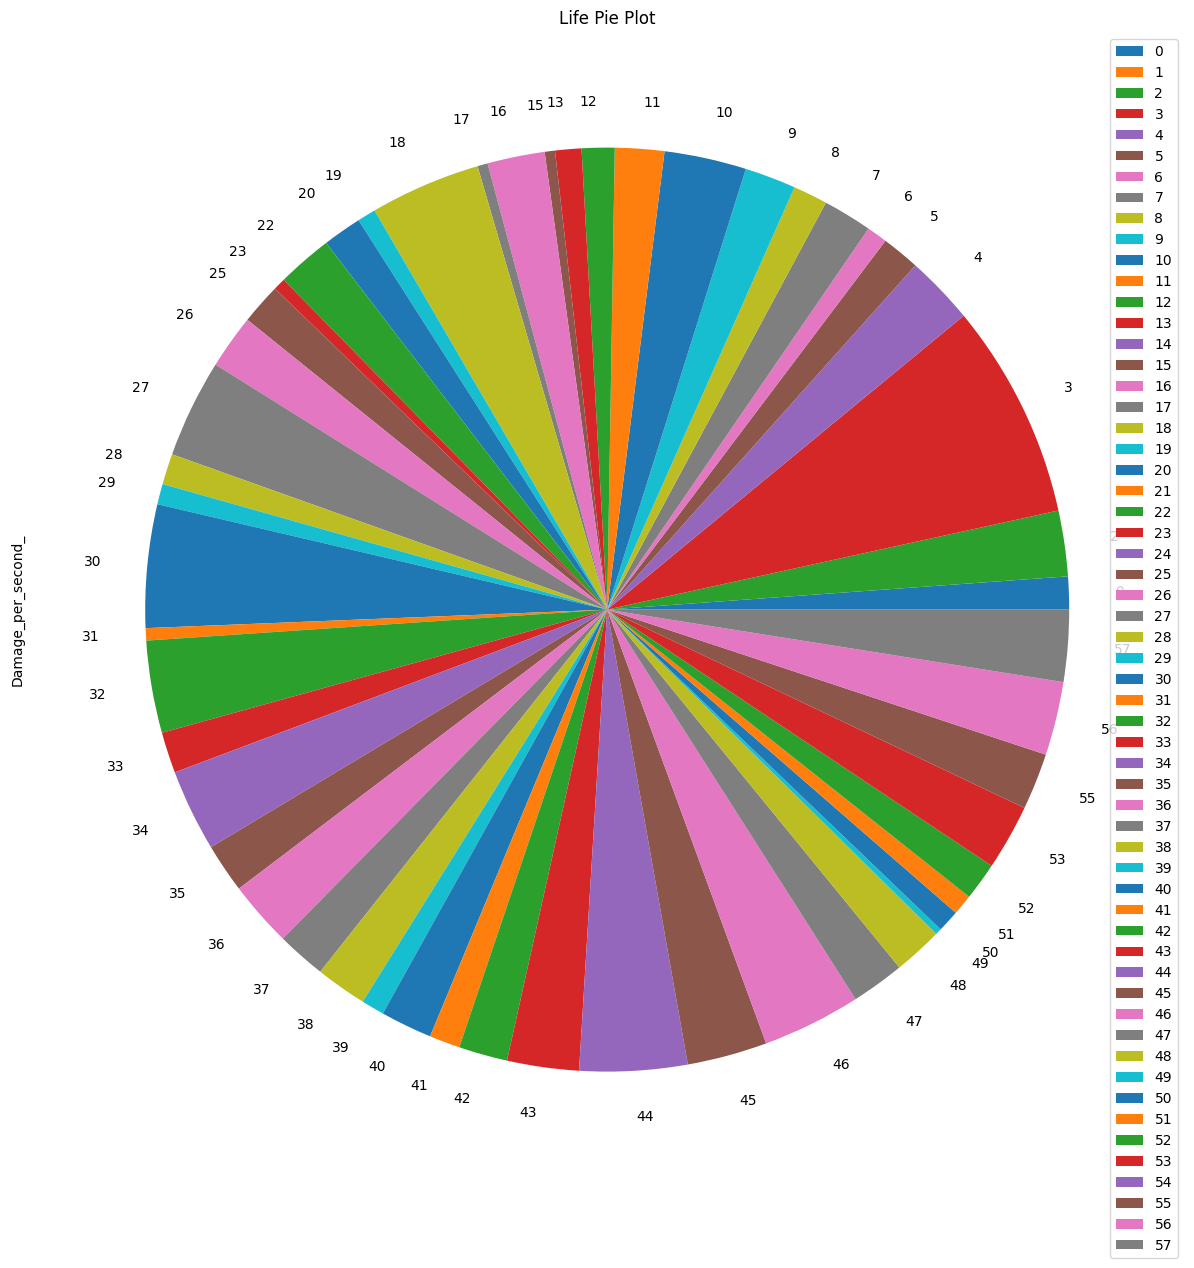

In [12]:
data.plot(kind='pie', x='Life',y='Damage_per_second_', figsize=(15,15))

plt.title('Life Pie Plot') 

In [13]:
character = {'Zayra' : 'female', 'Reaper' : 'male'}
print(character.keys())
print(character.values())

dict_keys(['Zayra', 'Reaper'])
dict_values(['female', 'male'])


In [14]:
character['Zayra'] = "female"
print(character)
character['Mercy'] = "female"
print(character)
del character['Mercy']
print(character)
print('hp' in character)
character.clear()
print(character)

{'Zayra': 'female', 'Reaper': 'male'}
{'Zayra': 'female', 'Reaper': 'male', 'Mercy': 'female'}
{'Zayra': 'female', 'Reaper': 'male'}
False
{}


In [15]:
series=data['Damage_per_second_']
print(type(series))
data_frame=data[['Damage_per_second_']]
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [16]:
x=data['Damage_per_second_']>150
data[x]

,Heroes,Damage_per_second_,Headshot_DPS__,Single_shot,Nanoboost_DPS,Health_per_Sec,Life,Reload
2,Bastion Recon,160.0,320.0,NaN,NaN,NaN,300,20.0
3,Bastion Turret,525.0,1050.0,NaN,787.5,NaN,300,200.0
4,D.va Mech,168.0,336.0,NaN,NaN,NaN,600,inf
10,Junkrat,200.0,NaN,120.0,NaN,NaN,200,5.0
18,McCree Sventa,270.0,NaN,45.0,NaN,NaN,200,6.0
27,Reaper,240.0,480.0,120.0,360.0,50.0,250,NaN
30,Reinhardt Pin,300.0,NaN,300.0,450.0,NaN,500,NaN
32,Roadhog LM,225.0,450.0,225.0,337.5,NaN,600,4.0
34,Soldier,200.0,400.0,20.0,NaN,40.0,200,25.0
36,Sombra,160.0,320.0,8.0,NaN,NaN,200,60.0


In [17]:
data[np.logical_and(data['Damage_per_second_']>150, data['Headshot_DPS__']>450)]

,Heroes,Damage_per_second_,Headshot_DPS__,Single_shot,Nanoboost_DPS,Health_per_Sec,Life,Reload
3,Bastion Turret,525.0,1050.0,NaN,787.5,NaN,300,200.0
27,Reaper,240.0,480.0,120.0,360.0,50.0,250,NaN
44,Torbjorn Molten RM,262.5,525.0,150.0,NaN,NaN,500,NaN
46,Tracer,240.0,480.0,6.0,NaN,NaN,150,40.0


In [18]:
data[(data['Damage_per_second_']>150)& (data['Headshot_DPS__']>450)]


,Heroes,Damage_per_second_,Headshot_DPS__,Single_shot,Nanoboost_DPS,Health_per_Sec,Life,Reload
3,Bastion Turret,525.0,1050.0,NaN,787.5,NaN,300,200.0
27,Reaper,240.0,480.0,120.0,360.0,50.0,250,NaN
44,Torbjorn Molten RM,262.5,525.0,150.0,NaN,NaN,500,NaN
46,Tracer,240.0,480.0,6.0,NaN,NaN,150,40.0
